In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import validation_curve, learning_curve, cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import matplotlib
matplotlib.rc('figure', figsize=[10,5])

import mlrose_hiive as mlrose

# random state
rs = 142

cv=5

# sizes for learning curves
train_sizes = np.linspace(0.2, 1.0, 9)
print(train_sizes)

[0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [2]:
x_data, y_data = make_classification(n_samples=3000, n_features=10, n_informative=10, n_redundant=0, random_state=rs)
x_data_df = pd.DataFrame(x_data, columns=["1","2","3","4","5","6","7","8","9","10"])
y_data_df = pd.DataFrame(y_data)

In [3]:
pd.set_option("display.max_rows", None)
print(x_data_df.info())
print(x_data_df.describe())
x_data_df.head(75)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       3000 non-null   float64
 1   2       3000 non-null   float64
 2   3       3000 non-null   float64
 3   4       3000 non-null   float64
 4   5       3000 non-null   float64
 5   6       3000 non-null   float64
 6   7       3000 non-null   float64
 7   8       3000 non-null   float64
 8   9       3000 non-null   float64
 9   10      3000 non-null   float64
dtypes: float64(10)
memory usage: 234.5 KB
None
                 1            2            3            4            5  \
count  3000.000000  3000.000000  3000.000000  3000.000000  3000.000000   
mean      0.477754    -0.977831    -0.490354     0.466762     0.488583   
std       1.734513     1.767066     2.172717     1.928848     1.731934   
min      -4.880580    -6.666235    -7.576704    -6.630464    -5.503467   
25%      -0.798467    -2.145418

,1,2,3,4,5,6,7,8,9,10
0,3.036270,0.355384,0.099499,-0.590639,0.601638,3.046671,3.496750,1.585665,-1.054231,-0.038638
1,3.508866,1.754086,1.698146,2.250775,-0.950100,2.304919,-1.312863,2.132722,-0.336639,-1.140260
2,0.466358,-0.313902,0.020077,-0.960897,-0.530311,-0.088203,2.903036,0.358854,0.220642,-1.963776
3,0.264963,2.385102,-1.274667,-2.345927,-0.075309,0.688412,3.531493,0.541239,1.387540,-0.449371
4,1.844012,1.902770,2.242362,3.624688,0.078515,2.346196,1.723919,-1.714465,-0.720974,-1.482244
5,-1.587398,-1.897894,0.443141,2.816325,2.578383,0.628624,-3.928444,-1.550559,-6.036055,0.006616
6,-1.755738,-5.205454,2.625987,0.996824,2.596227,1.756375,-0.999557,2.382684,-2.094007,-0.444590
7,3.510736,-1.897873,2.161093,1.229760,-0.045918,1.077112,1.333075,1.502721,-1.129491,0.135159
8,-0.874009,-2.091041,-2.802860,1.883395,-2.489607,2.234282,1.621240,-0.026276,5.516719,-1.610508
9,-1.267603,-1.830121,-0.577553,-1.435092,-0.904945,3.273254,-1.753904,-2.822652,0.159166,0.653353


In [4]:
print(y_data_df.info())
print(y_data_df.describe())
y_data_df.head(75)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB
None
                 0
count  3000.000000
mean      0.498667
std       0.500082
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


,0
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,0
9,0


In [5]:
print(len(y_data_df[(y_data_df[0]==1)]))
print(len(y_data_df[(y_data_df[0]==0)]))

1496
1504


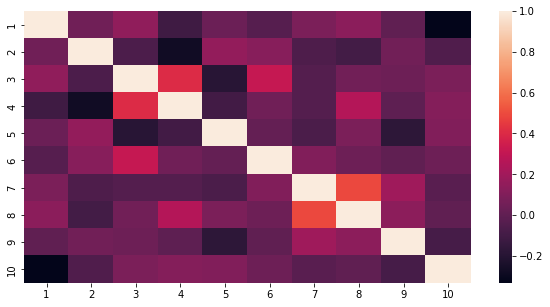

In [6]:
data_corr = sns.heatmap(x_data_df.corr())

In [7]:
# split into train, validation and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = rs, shuffle = True)
y_train.dtype

dtype('int64')

In [24]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'random_hill_climb', max_iters = 1000, restarts=25,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, clip_max = 5, max_attempts = 100,
                                 random_state = rs, curve=True)

t0=time.time()
nn_model1.fit(x_train, y_train)
t1=time.time()
fit_time1 = t1-t0
print(fit_time1)

59.51803183555603


In [25]:
ypredict1 = nn_model1.predict(x_test)
test_accuracy1 = accuracy_score(y_test, ypredict1)
f1 = f1_score(y_test, ypredict1) 
print (f'fit_time = {fit_time1}')
print (f'accuracy score = {test_accuracy1}')
print("f1 score: ", f1)
print (classification_report(y_test, ypredict1))

fit_time = 59.51803183555603
accuracy score = 0.485
f1 score:  0.641946697566628
              precision    recall  f1-score   support

           0       0.32      0.05      0.08       293
           1       0.50      0.90      0.64       307

    accuracy                           0.48       600
   macro avg       0.41      0.48      0.36       600
weighted avg       0.41      0.48      0.37       600



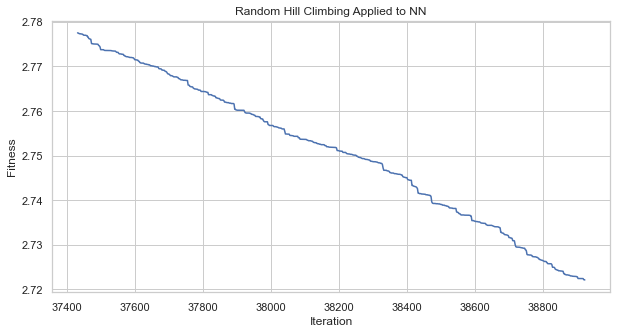

In [56]:
sns.set_theme(style="whitegrid")
df_rhc_fitness_curve = pd.DataFrame(nn_model1.fitness_curve, columns=['Fitness', 'Iteration'])
ax = sns.lineplot(x=df_rhc_fitness_curve['Iteration'], y=df_rhc_fitness_curve['Fitness'],data=nn_model1.fitness_curve)
ax.set_title("Random Hill Climbing Applied to NN")
ax.set_ylabel("Fitness")
ax.set_xlabel("Iteration")
plt.savefig('experiment_results/RHC_NN_FitnessIteration_LinePlot.png', dpi=300)

In [27]:
nn_model2 = mlrose.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'simulated_annealing', max_iters = 1000, schedule=mlrose.GeomDecay(),
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, clip_max = 5, max_attempts = 100,
                                 random_state = rs, curve=True)

t0=time.time()
nn_model2.fit(x_train, y_train)
t1=time.time()
fit_time2 = t1-t0
print(fit_time2)

3.289400100708008


In [28]:
ypredict2 = nn_model2.predict(x_test)
test_accuracy2 = accuracy_score(y_test, ypredict2)
f1_2 = f1_score(y_test, ypredict2) 
print (f'fit_time = {fit_time2}')
print (f'accuracy score = {test_accuracy2}')
print("f1 score: ", f1_2)
print (classification_report(y_test, ypredict2))

fit_time = 3.289400100708008
accuracy score = 0.48333333333333334
f1 score:  0.6412037037037037
              precision    recall  f1-score   support

           0       0.30      0.04      0.08       293
           1       0.50      0.90      0.64       307

    accuracy                           0.48       600
   macro avg       0.40      0.47      0.36       600
weighted avg       0.40      0.48      0.37       600



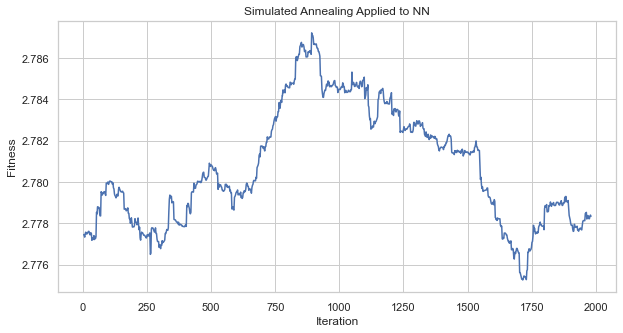

In [55]:
sns.set_theme(style="whitegrid")
df_sa_fitness_curve = pd.DataFrame(nn_model2.fitness_curve, columns=['Fitness', 'Iteration'])
ax = sns.lineplot(x=df_sa_fitness_curve['Iteration'], y=df_sa_fitness_curve['Fitness'],data=nn_model2.fitness_curve)
ax.set_title("Simulated Annealing Applied to NN")
ax.set_ylabel("Fitness")
ax.set_xlabel("Iteration")
plt.savefig('experiment_results/SA_NN_FitnessIteration_LinePlot.png', dpi=300)

In [21]:
nn_model3 = mlrose.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'genetic_alg', pop_size=200,
                                 mutation_prob=0.1, max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, clip_max = 5, max_attempts = 100,
                                 random_state = rs, curve=True)

t0=time.time()
nn_model3.fit(x_train, y_train)
t1=time.time()
fit_time3 = t1-t0
print(fit_time3)

189.51207494735718


In [22]:
ypredict3 = nn_model3.predict(x_test)
test_accuracy3 = accuracy_score(y_test, ypredict3)
f1_3 = f1_score(y_test, ypredict3) 
print (f'fit_time = {fit_time3}')
print (f'accuracy score = {test_accuracy3}')
print("f1 score: ", f1_3)
print (classification_report(y_test, ypredict3))

fit_time = 189.51207494735718
accuracy score = 0.8283333333333334
f1 score:  0.8303130148270181
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       293
           1       0.84      0.82      0.83       307

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



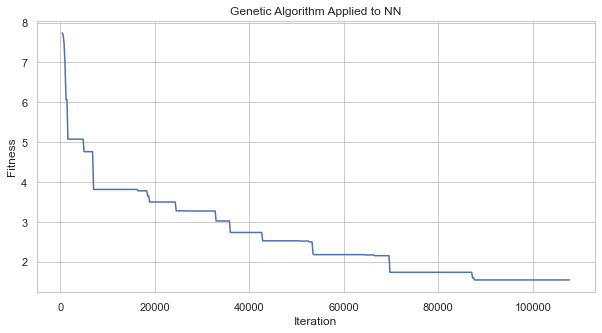

In [54]:
sns.set_theme(style="whitegrid")
df_ga_fitness_curve = pd.DataFrame(nn_model3.fitness_curve, columns=['Fitness', 'Iteration'])
ax = sns.lineplot(x=df_ga_fitness_curve['Iteration'], y=df_ga_fitness_curve['Fitness'],data=nn_model3.fitness_curve)
ax.set_title("Genetic Algorithm Applied to NN")
ax.set_ylabel("Fitness")
ax.set_xlabel("Iteration")
plt.savefig('experiment_results/GA_NN_FitnessIteration_LinePlot.png', dpi=300)

In [17]:
nn_model4 = mlrose.NeuralNetwork(hidden_nodes = [16], activation = 'relu',
                                 algorithm = 'gradient_descent', max_iters = 1000,
                                 bias = True, is_classifier = True, learning_rate = 0.001,
                                 early_stopping = True, clip_max = 5, max_attempts = 100,
                                 random_state = rs, curve=True)

t0=time.time()
nn_model4.fit(x_train, y_train)
t1=time.time()
fit_time4 = t1-t0
print(fit_time4)

3.8949978351593018


In [18]:
ypredict4 = nn_model4.predict(x_test)
test_accuracy4 = accuracy_score(y_test, ypredict4)
f1_4 = f1_score(y_test, ypredict4) 
print (f'fit_time = {fit_time4}')
print (f'accuracy score = {test_accuracy4}')
print("f1 score: ", f1_4)
print (classification_report(y_test, ypredict4))

fit_time = 3.8949978351593018
accuracy score = 0.945
f1 score:  0.9470304975922953
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       293
           1       0.93      0.96      0.95       307

    accuracy                           0.94       600
   macro avg       0.95      0.94      0.94       600
weighted avg       0.95      0.94      0.94       600



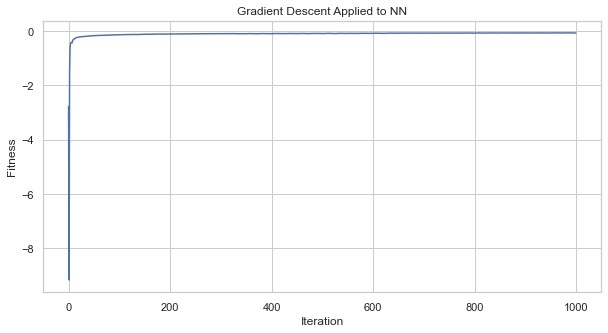

In [48]:
sns.set_theme(style="whitegrid")
ax = sns.lineplot(data=nn_model4.fitness_curve)
ax.set_title("Gradient Descent Applied to NN")
ax.set_ylabel("Fitness")
ax.set_xlabel("Iteration")
plt.savefig('experiment_results/GD_NN_FitnessIteration_LinePlot.png', dpi=300)

In [20]:
nn_model4.loss

0.07434978202565495